# Lets train a FFNN for a Regression Problem

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import keras.models as models
from keras.models import Sequential
from keras.layers import Dense, Dropout

## Reading the dataset

In [2]:
df = pd.read_csv("./datasets/cardio_dataset.csv")
df.head()

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,2,48,236,66,0,2,0,1.1
1,1,48,260,51,0,2,1,7.0
2,1,44,187,49,1,2,0,7.0
3,2,42,216,57,1,2,0,0.4
4,2,56,156,42,0,2,0,2.2


In [3]:
# shape of the dataset
df.shape

(6644, 8)

## Data and Target

In [4]:
dataset = df.values          # convert data into numpy values

data = dataset[:,:7]
target = dataset[:,7]

In [5]:
data

array([[  2.,  48., 236., ...,   0.,   2.,   0.],
       [  1.,  48., 260., ...,   0.,   2.,   1.],
       [  1.,  44., 187., ...,   1.,   2.,   0.],
       ...,
       [  1.,  65., 212., ...,   1.,   1.,   0.],
       [  1.,  66., 184., ...,   0.,   1.,   0.],
       [  2.,  45., 203., ...,   0.,   2.,   0.]])

In [6]:
target

array([ 1.1,  7. ,  7. , ..., 30.6, 23.8,  1. ])

In [7]:
data.shape

(6644, 7)

In [8]:
target.shape

(6644,)

## Scaling ( Normalization )

In [9]:
target = np.reshape(target, (-1,1))   # conert data into numpy values

scaler_data = MinMaxScaler()      
scaler_target = MinMaxScaler()

data_scaled = scaler_data.fit_transform(data)
target_scaled = scaler_target.fit_transform(target)  

In [10]:
data_scaled[:10]

array([[1.        , 0.20512821, 0.40045249, 0.29347826, 0.        ,
        1.        , 0.        ],
       [0.        , 0.20512821, 0.45475113, 0.21195652, 0.        ,
        1.        , 1.        ],
       [0.        , 0.1025641 , 0.28959276, 0.20108696, 1.        ,
        1.        , 0.        ],
       [1.        , 0.05128205, 0.35520362, 0.24456522, 1.        ,
        1.        , 0.        ],
       [1.        , 0.41025641, 0.21945701, 0.16304348, 0.        ,
        1.        , 0.        ],
       [0.        , 0.1025641 , 0.23303167, 0.24456522, 1.        ,
        1.        , 0.        ],
       [0.        , 0.25641026, 0.41855204, 0.19021739, 0.        ,
        1.        , 0.        ],
       [0.        , 0.20512821, 0.34615385, 0.09782609, 1.        ,
        1.        , 0.        ],
       [1.        , 0.66666667, 0.32352941, 0.22282609, 0.        ,
        1.        , 1.        ],
       [0.        , 0.58974359, 0.28733032, 0.18478261, 1.        ,
        1.        , 0. 

In [11]:
target_scaled[:10]

array([[0.01172333],
       [0.08089097],
       [0.08089097],
       [0.003517  ],
       [0.02461899],
       [0.03399766],
       [0.04806565],
       [0.2028136 ],
       [0.15592028],
       [0.20164127]])

## Visualization of Scaling   

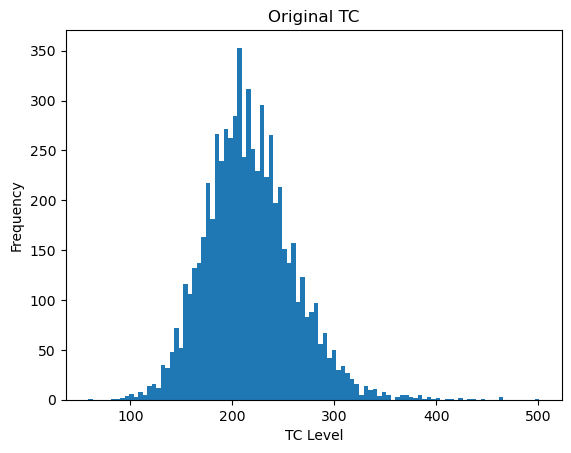

In [12]:
# for coulmn number 2 
plt.hist(data[:,2],bins=100) 
plt.title('Original TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')
plt.show()

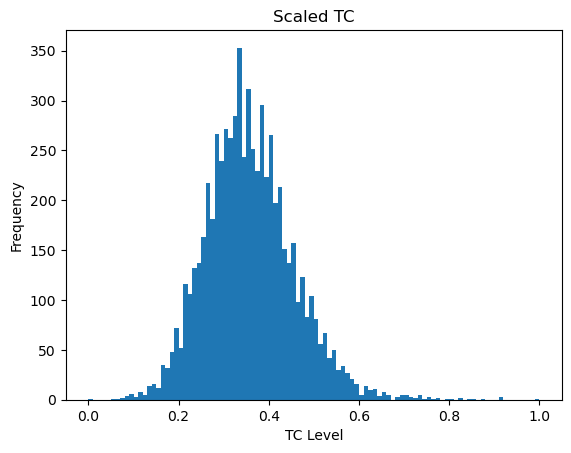

In [13]:
plt.hist(data_scaled[:,2],bins=100) #scale karata passe 0-1 athara value walata awilla graph eke.
plt.title('Scaled TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')
plt.show()

## Train Test Split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data_scaled, target_scaled, test_size=0.2, random_state=42)

## FFNN Architecture

In [15]:
model = Sequential()  

model.add(Dense(128, input_dim=7, activation="sigmoid", kernel_initializer="normal"))
model.add(Dropout(0.5))                    
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1, activation="linear"))   

# compile
model.compile(optimizer="adam", loss="mse", metrics=["mse", "mae"])

model.summary()

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,941 (38.83 KB)

 Trainable params: 9,941 (38.83 KB)

 Non-trainable params: 0 (0.00 B)

## Saving The Best Model

In [16]:
import keras

class CustomCallback(keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs=None):          # "on_epoch_end" functiion cant change it is standard, but can change the inside things
        predicted_result = model.predict(x_test)
        r2 = r2_score(y_test, predicted_result)
        print(f"epoch: {epoch} - r2 score: {r2}")

[Full details at keras official site](https://www.tensorflow.org/guide/keras/custom_callback) <br>
( these functions are at the official keras site )

In [17]:
from keras.callbacks import ModelCheckpoint  # save the model # monitor="val_loss", save_best_only=True = by using validation loss the model only save best models, if one model save then next one in better than ealier saved best model then ealier model lost and save the new best model.

checkpoint = ModelCheckpoint("models/model-{epoch:03d}.keras", monitor="val_loss", save_best_only=True, mode="auto") # models/model-{epoch:03d}.keras = save path, by 3 digits of an epoch, save as .keras type

## Train The Model

In [18]:
history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test), callbacks=[checkpoint, CustomCallback()])

Epoch 1/400
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step   - loss: 0.0706 - mae: 0.1992 - mse: 
epoch: 0 - r2 score: -0.06954025963654265
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0704 - mae: 0.1989 - mse: 0.0704 - val_loss: 0.0254 - val_mae: 0.1341 - val_mse: 0.0254
Epoch 2/400
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0.0288 - mae: 0.1293 - mse: 0.0
epoch: 1 - r2 score: 0.024774609026238736
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0287 - mae: 0.1292 - mse: 0.0287 - val_loss: 0.0231 - val_mae: 0.1211 - val_mse: 0.0231
Epoch 3/400
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0.0247 - mae: 0.1203 - mse: 0.0
epoch: 2 - r2 score: 0.039094767517482754
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0247 - mae: 0.1202 - mse: 0.0247 - val_loss: 0.0228 - val_mae: 0.1191 - val_mse: 0.0228
Epoch 4/400
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0.0251 - mae: 0.1171 - mse: 0.0
epoch: 3 - r2 score: 0.053071797315151215
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - los

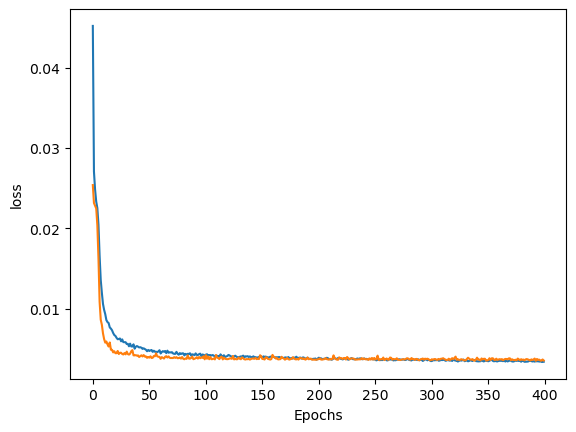

In [19]:
# Plot
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

## R2 Score

In [20]:
predicted_result = model.predict(x_test)

r2 = r2_score(y_test, predicted_result)
print("r2 score: ", r2)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
r2 score:  0.8513527092067913


In [21]:
print("actual: ", y_test[:10])
print("predicted: ", predicted_result[:10].T)

actual:  [[0.05627198]
 [0.00117233]
 [0.02461899]
 [0.03985932]
 [0.44783118]
 [0.01641266]
 [0.0961313 ]
 [0.40797186]
 [0.05041032]
 [0.06213365]]
predicted:  [[0.08449458 0.01491054 0.02795185 0.03789612 0.63189566 0.02306223
  0.10133225 0.18187806 0.05221617 0.06910366]]


## Print the results without scaling

In [22]:
# Print the results without scaling
print("actual inverse scaled: ", scaler_target.inverse_transform(y_test[:10].T))
print("predicted inverse scaled", scaler_target.inverse_transform(predicted_result[:10].T))

actual inverse scaled:  [[ 4.9  0.2  2.2  3.5 38.3  1.5  8.3 34.9  4.4  5.4]]
predicted inverse scaled [[ 7.3073874  1.3718688  2.484293   3.3325393 54.000698   2.0672078
   8.743641  15.614199   4.5540395  5.994542 ]]


## Predictions

In [23]:
test_data = np.array([0,63,186,46,1,1,0]).reshape(1,-1)

In [24]:
scaled_test_data = scaler_data.transform(test_data)

In [25]:
result = model.predict(scaled_test_data)
print(result) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.39694038]]


In [26]:
result_without_scaled = scaler_target.inverse_transform(result)
print("Result: ", result_without_scaled)

Result:  [[33.959015]]


## Save all the models

In [28]:
import joblib

joblib.dump(scaler_data, "scaler_data.sav")
joblib.dump(scaler_target, "scaler_target.sav")  # These files are need for add to webapp because of scaling options

['scaler_target.sav']